# El tratamiento de las variables categoricas
##### https://www.udemy.com/machinelearningpython/learn/v4/t/lecture/9923910?start=15


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv("../Datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender=pd.get_dummies(df["Gender"],prefix="Gender")
dummy_city_tier =pd.get_dummies(df["City Tier"],prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names=df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new=df[column_names].join(dummy_gender)
column_names=df_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [9]:
df_new=df_new[column_names].join(dummy_city_tier)
column_names=df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols=[
 'Monthly Income',
 'Transaction Time',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3',
 'Record' 
]

In [11]:
X=df_new[feature_cols] 
Y=df_new["Total Spend"]

In [12]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(lm.intercept_)

-79.41713030137089


In [14]:
print(lm.coef_)

[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.02501325554562),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049542),
 ('City_Tier 2', 55.138974309232275),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445639)]

In [16]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:

* Total_Spend = -79.41713030137089+ 'Monthly Income' *  0.14753898049205746 +
 'Transaction Time' * 0.1549461254958966 + 
 'Gender_Female' * -131.02501325554562 + 
 'Gender_Male' * 131.0250132555456 + 
 'City_Tier 1' * 76.76432601049542 +
 'City_Tier 2' * 55.138974309232275  +
 'City_Tier 3' * -131.90330031972783 +
 'Record' * 772.2334457445639

In [17]:
df_new["prediction"] =  -79.41713030137089 + df_new['Monthly Income'] *  0.14753898049205746 + df_new['Transaction Time'] * 0.1549461254958966 +  df_new['Gender_Female'] * -131.02501325554562 +  df_new['Gender_Male'] * 131.0250132555456 +  df_new['City_Tier 1'] * 76.76432601049542 + df_new['City_Tier 2'] * 55.138974309232275  + df_new['City_Tier 3'] * -131.90330031972783 + df_new['Record'] * 772.2334457445639 

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new["prediction"]- df_new["Total Spend"]) ** 2)
SSD

1517733985.3408163

In [20]:
RSE=np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [21]:
sales_mean=np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [22]:
error=RSE/sales_mean
error

0.13031135680294162

## Eliminar variables dummy redundantes

In [23]:
dummy_gender=pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1:]

In [24]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [25]:
dummy_city_tier=pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [30]:
column_names=df.columns.values.tolist()
df_new=df[column_names].join(dummy_gender)
column_names=df_new.columns.values.tolist()
df_new=df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [34]:
feature_cols=['Monthly Income','Transaction Time','Gender_Male', 'City_Tier 2','City_Tier 3','Record' ]
X=df_new[feature_cols]
Y=df_new["Total Spend"]
lm= LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print(lm.intercept_)

-133.67781754642238


In [37]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.05002651109584),
 ('City_Tier 2', -21.625351701262574),
 ('City_Tier 3', -208.66762633022304),
 ('Record', 772.2334457445636)]

In [38]:
lm.score(X,Y)

0.9179923586131016

In [39]:
data_auto=pd.read_csv("../Datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [40]:
data_auto.shape

(406, 9)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'CV vs MPG')

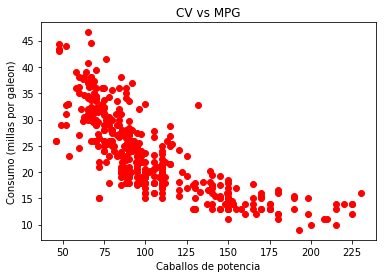

In [45]:
data_auto["mpg"]=data_auto["mpg"].dropna()
data_auto["horsepower"]=data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeon)")
plt.title("CV vs MPG")

## Modelo de regresion lineal
* mpg = a+ b * horsepower

In [50]:
X= data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y= data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data=X[:,np.newaxis]
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

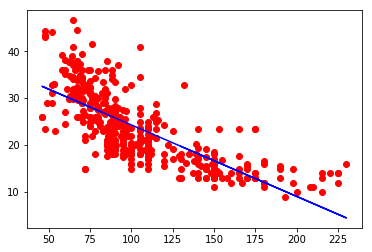

In [51]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data),color="blue")

In [52]:
lm.score(X_data,Y)

0.574653340645025

In [55]:
SSD=np.sum((Y-lm.predict(X_data))**2)
RSE=np.sqrt(SSD/(len(X_data)-1))
y_mean=np.mean(Y)
error=RSE/y_mean
SSD,RSE,error


(10315.75196006092, 5.046879480825511, 0.21462773361633458)

# Modelo de regresion cuadratico
* mpg = a+ b * horsepower^2

In [56]:
X_data=X**2
X_data=X_data[:,np.newaxis]

In [58]:
lm=LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lm.score(X_data,Y)

0.4849887034823205

In [60]:
SSD=np.sum((Y-lm.predict(X_data))**2)
RSE=np.sqrt(SSD/(len(X_data)-1))
y_mean=np.mean(Y)
error=RSE/y_mean
SSD,RSE,error

(12490.350340501926, 5.553410772769817, 0.236168898529981)

# Modelo de regresion cuadratico
* mpg =a+ b * horsepower +  c * horsepower^2

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [62]:
poly= PolynomialFeatures(degree=2)
X_data=poly.fit_transform(X[:,np.newaxis])

In [63]:
lm=linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lm.score(X_data,Y)

0.6439066584257469

In [67]:
lm.intercept_

55.02619244708117

In [68]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

* mpg=55.02619244708117  -0.43404318 hp + 0.00112615 * hp^2

In [85]:
def regression_validation(X_data,Y,Y_pred):
    SSD=np.sum((Y-Y_pred)**2)
    RSE=np.sqrt(SSD/(len(X_data)-1))
    y_mean=np.mean(Y)
    error=RSE/y_mean
    SSD,RSE,error*100
    print("SSD: ", SSD," RSE: ",RSE, " y_mean: ",y_mean," Error: ",error*100)

In [92]:
for d in range(2,7):
    poly= PolynomialFeatures(degree=d)
    X_data=poly.fit_transform(X[:,np.newaxis])
    lm=linear_model.LinearRegression()
    lm.fit(X_data,Y)
    lm.score(X_data,Y)
    print(d,"° - R2: ", lm.score(X_data,Y))
    print(""," intercept_: ", lm.intercept_ )
    print(""," lm.coef_: ", lm.coef_ )
    regression_validation(X_data,Y,lm.predict(X_data))
    print("---------------------------")

2 ° - R2:  0.6439066584257469
  intercept_:  55.02619244708117
  lm.coef_:  [ 0.         -0.43404318  0.00112615]
SSD:  8636.180643524502  RSE:  4.61778115803654  y_mean:  23.51457286432162  Error:  19.63795466190689
---------------------------
3 ° - R2:  0.6444678885560744
  intercept_:  58.44877411167316
  lm.coef_:  [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD:  8622.56936742855  RSE:  4.614140736300908  y_mean:  23.51457286432162  Error:  19.622473106036676
---------------------------
4 ° - R2:  0.6467674189704501
  intercept_:  40.09664386272614
  lm.coef_:  [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD:  8566.799832491355  RSE:  4.5991947315797574  y_mean:  23.51457286432162  Error:  19.55891250126878
---------------------------
5 ° - R2:  0.6547512491829146
  intercept_:  -40.69399209247344
  lm.coef_:  [ 0.00000000e+00  4.00021890e+00 -7.54802462e-02  6.19621637e-04
 -2.36220983e-06  3.41983064e-09]
SSD:  8373.17

# El problema de los outliers

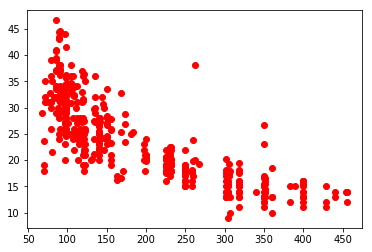

In [94]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [102]:
X= data_auto["displacement"].fillna(data_auto["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm=LinearRegression()
lm.fit(X,Y)
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [97]:
lm.score(X,Y)

0.6261049762826918

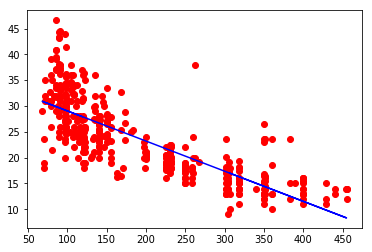

In [101]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X),color="blue")

In [112]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [113]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>21)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [114]:
data_auto_clean=data_auto.drop([395,305,372,258])

In [117]:
X= data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm=LinearRegression()
lm.fit(X,Y)
lm.get_params()



<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [119]:
lm.score(X,Y)

0.6466514317531822

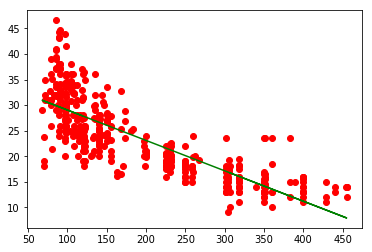

In [116]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X),color="green")